## ABOUT THE PROJECT 

This project revolves around the comprehensive analysis of Google Play Store data, encompassing a diverse range of applications across various categories. The ultimate objective is to formulate predictions for the development of a free app that can optimize public engagement and achieve maximum installations.

The data exploration involves an in-depth examination of app categories, installations. An essential step in the process is the identification and correction of outliers and the removal of duplicate entries. The subsequent focus lies on discerning patterns within the dataset to extract valuable insights.

By visualizing the distribution of app categories, installation frequencies, and average installations per category, the project aims to unravel trends and preferences within the Google Play Store ecosystem. The ultimate goal is to guide the decision-making process for the development of a free app that aligns with user demands, maximizing public traffic and ensuring a successful app launch.

This multifaceted approach, involving data cleaning, exploration, and analysis, lays the groundwork for informed decision-making in the competitive landscape of the Google Play Store.

## IMPORTING THE REQUIRED LIBRARIES 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

## READING THE CSV FILE

In [2]:
df = pd.read_csv("googleplaystore.csv")

## UNDERSTANDING THE DATA

In [3]:
# Checking how the data looks like
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5900,Cures A-Z,HEALTH_AND_FITNESS,4.0,265,4.1M,"100,000+",Free,0,Everyone,Health & Fitness,"August 13, 2015",2.1,3.0 and up
7417,Grand Theft Auto: San Andreas,GAME,4.4,348962,26M,"1,000,000+",Paid,$6.99,Mature 17+,Action,"March 21, 2015",1.08,3.0 and up
8197,Just Dance Now,GAME,4.2,794058,56M,"10,000,000+",Free,0,Everyone,Music,"June 12, 2018",2.3.0,4.4 and up
1786,Episode - Choose Your Story,GAME,4.3,1841061,Varies with device,"50,000,000+",Free,0,Teen,Simulation,"July 31, 2018",Varies with device,Varies with device
3033,Golfshot: Golf GPS + Tee Times,SPORTS,4.3,7543,25M,"500,000+",Free,0,Everyone,Sports,"July 11, 2018",1.31.0,4.1 and up


In [4]:
# It has 10841 rows and 13 columns
df.shape

(10841, 13)

In [5]:
# Checking if there are null values or not
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

The above output shows that the data contains 1474, 1, 1, 8, 3 null values in the Rating, Type ,Content Rating ,Current Ver, Android Ver respectively 

## CLEANING THE DATA

### Part 1 : Detecting and Handling an outlier

In [6]:
df['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

The above output shows the category counts but there is one outlier that is "1.9". "1.9" is not a category so there is some mistake in the dataset

In [7]:
df[df['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


The above output shows that category value is "1.9" which is wrong. The mistake is that the category value is not there instead rating value is written in category column. All the values is shifted left from category onwards. So first we need to know that in which category "Life Made WI-Fi Touchscreen Photo Frame" lies. 

In [8]:
new_lst = ['Life Made WI-Fi Touchscreen Photo Frame', 'LIFESTYLE' , '1.9', 19.0, '3.0M',
        '1,000+', 'Free', '0', 'Everyone', 'LIFESTYLE', 'February 11, 2018',
        '1.0.19', '4.0 and up']

Now the category value has been added to the above record

In [9]:
df[df['Category'] == '1.9'] = new_lst

In [10]:
df['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               383
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

Outlier has been handled now our data has no outlier

### Part 2: Handling Duplicated Values

In [11]:
app_count = df['App'].value_counts()
app_count

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9660, dtype: int64

In [12]:
# printing only those apps which are duplicated 
num_of_duplicate_apps = app_count[app_count > 1]
num_of_duplicate_apps

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
ESPN                                                 7
Duolingo: Learn Languages Free                       7
Candy Crush Saga                                     7
                                                    ..
Transenger – Ts Dating and Chat for Free             2
Random Video Chat                                    2
Clover Dating App                                    2
Docs To Go™ Free Office Suite                        2
English Dictionary - Offline                         2
Name: App, Length: 798, dtype: int64

The data contains 798 duplicate values i.e some apps have more than one record in the dataset. We will clean them by keeping only the reocrd which has max ratings among the duplicate records  

In [13]:
# Checking if the instagram record is duplicated or not 
"Instagram" in app_count[app_count > 1]

True

In [14]:
df[df["App"] == "Instagram"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


The above output shows that the instagram app has four records in the data but we will keep only that record which has max ratings i.e data with index 2604

In [15]:
# Checking the number of duplicated apps and keeping only the one record while dropping others
duplicated_apps = df[df.duplicated(subset= ["App"] , keep='first')]
duplicated_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4M,"100,000+",Free,0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,"1,000,000+",Free,0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410,60M,"50,000+",Free,0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12M,"1,000,000+",Free,0,Everyone,Shopping,"July 30, 2018",3.9,4.4 and up


In [16]:
df.shape

(10841, 13)

In [17]:
duplicated_apps.shape

(1181, 13)

In [18]:
10841-1181

9660

After cleaning the duplicate values only 9660 records will be left.

In [19]:
# Grouping app on the basis of reviews and getting the apps with max ratings
max_review = df.groupby('App')["Reviews"].max()
max_review

App
"i DT" Fútbol. Todos Somos Técnicos.                   27
+Download 4 Instagram Twitter                       40467
- Free Comics - Comic Apps                            115
.R                                                    259
/u/app                                                573
                                                    ...  
뽕티비 - 개인방송, 인터넷방송, BJ방송                               414
💎 I'm rich                                            718
💘 WhatsLov: Smileys of love, stickers and GIF       22098
📏 Smart Ruler ↔️ cm/inch measuring for homework!       19
🔥 Football Wallpapers 4K | Full HD Backgrounds 😍    11661
Name: Reviews, Length: 9660, dtype: object

In [20]:
# Creating an empty list for to keep clean data
android_clean = []

# Creating an empty list to keep track of already added apps
already_added = []

# Loop through each record and store the app name and reviews in name and n_reviews respectively 
for index, row in df.iterrows():
    name = row["App"]
    n_reviews = row['Reviews']
    
# checking if the max_review of the specific app is equal to n_reviews of that app then append in the android_clean list if it reapeats append in aready_added list
    if (max_review[name] == n_reviews) and (name not in already_added): 
        android_clean.append(row)
        already_added.append(name)

In [21]:
len(android_clean)

9660

The duplicate values are cleaned and we have got the cleaned list of apps without duplication 

In [22]:
android_clean = pd.DataFrame(android_clean)

## Part 3: Removing Non-English Apps

In [23]:
# This function checks whether the given app is english or not and it allows less than or equal to 3 emojis with english app
def english_apps(app_name):
    eng_apps = []
    
    for i in app_name:
        if ord(i) < 127:
            eng_apps.append(True)
        else: 
            eng_apps.append(False)

        
    non_ascii = 0
    for j in eng_apps:
        if j == False:
            non_ascii +=1
            
    if non_ascii < 3:
        return True
    else:
        return False   
        

In [24]:
english_apps("Instagram😍😍😍😍")

False

In [25]:
android_clean = android_clean[android_clean['App'].apply(english_apps)]
android_clean

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


## Part 4: Removing paid apps

In [26]:
android_clean['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$11.99', '$79.99', '$16.99', '$14.99', '$1.00',
       '$29.99', '$12.99', '$2.49', '$24.99', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [27]:
android_clean = android_clean[android_clean["Price"] == "0"]
android_clean

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


Our cleaning part is done in first part we handled outlier, in second part we handled duplciated values, in third part we removed non-english apps , in fourth part we removed paid apps. Now we have 8847 records in our dataset, we will work on this data to analyze and suggest the product we required.

# DATA ANALYSIS

## 1. Most Common Apps By Genre

In [28]:
android_clean['Category'].value_counts(normalize = True) * 100

FAMILY                 18.966881
GAME                    9.664293
TOOLS                   8.443540
BUSINESS                4.600430
PRODUCTIVITY            3.899627
LIFESTYLE               3.899627
FINANCE                 3.707471
MEDICAL                 3.526619
SPORTS                  3.390980
PERSONALIZATION         3.323160
COMMUNICATION           3.232734
HEALTH_AND_FITNESS      3.085792
PHOTOGRAPHY             2.950153
NEWS_AND_MAGAZINES      2.803210
SOCIAL                  2.667571
TRAVEL_AND_LOCAL        2.339776
SHOPPING                2.249350
BOOKS_AND_REFERENCE     2.136317
DATING                  1.865039
VIDEO_PLAYERS           1.797219
MAPS_AND_NAVIGATION     1.390302
FOOD_AND_DRINK          1.243359
EDUCATION               1.175540
ENTERTAINMENT           0.960778
LIBRARIES_AND_DEMO      0.938171
AUTO_AND_VEHICLES       0.926868
HOUSE_AND_HOME          0.802532
WEATHER                 0.791229
EVENTS                  0.712106
PARENTING               0.655589
ART_AND_DE

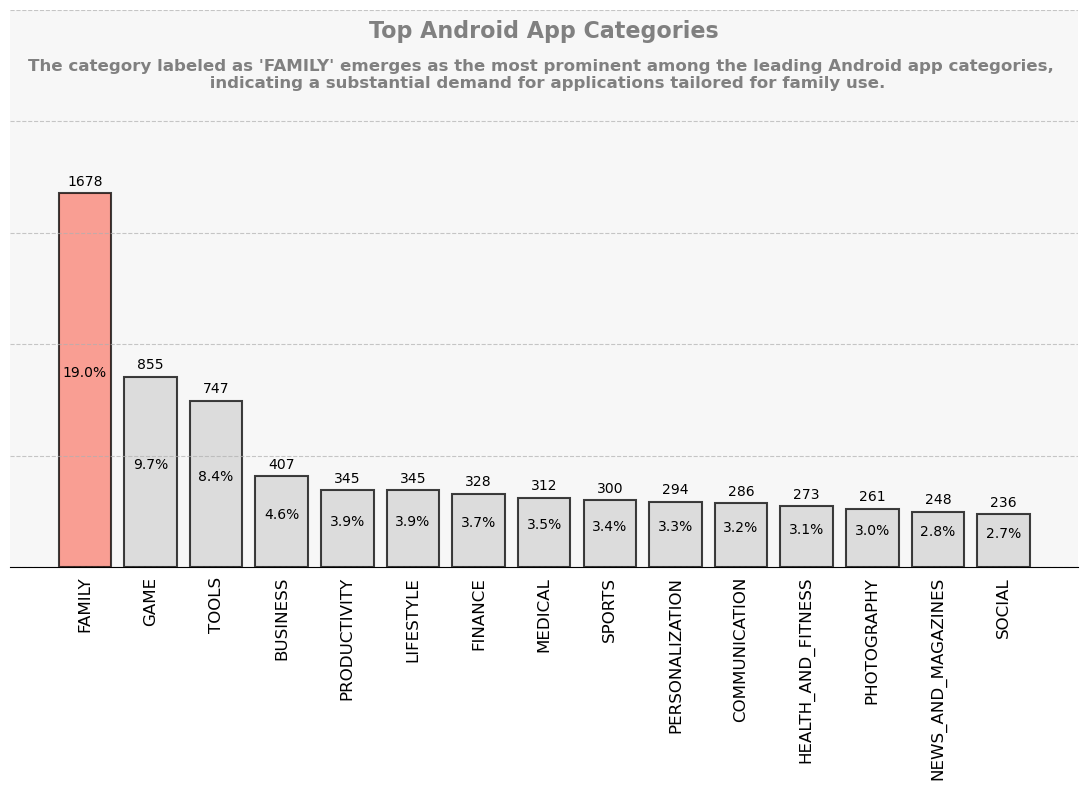

In [29]:
categories = android_clean['Category'].value_counts().index[:15]
counts = android_clean['Category'].value_counts().values[:15]
percentage = round(android_clean['Category'].value_counts(normalize = True) * 100 , 1)[:15]

# Creating a stylish bar chart
plt.figure(figsize=(12,8))
bars = plt.bar(categories , counts , color='lightgray', alpha=0.75, edgecolor='black', linewidth=1.5)
plt.xticks(rotation=90 , fontsize=12)
plt.yticks(range(0,3000,500), [], fontsize=12)
plt.tick_params(bottom=0, left=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='')

# Find the category with highest count 
max_count_category = categories[counts.argmax()]

# Highlight the bar for the category with the highest count
max_count_index = list(categories).index(max_count_category)
bars[max_count_index].set_color('salmon')
bars[max_count_index].set_edgecolor('black')

# Adding data labels and percentages inside the bar
for bar,perc in zip(bars,percentage):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 20, '%d' % int(height), ha='center', va='bottom', fontsize=10)
    plt.text(bar.get_x() + bar.get_width()/2, height/2, f'{perc}%', ha='center', va='bottom', fontsize=10 , color='black')

# Adding a background color
ax = plt.gca()
ax.set_facecolor('#f7f7f7')

# Adding chart title
plt.text(0.5,0.95,"Top Android App Categories", ha='center',fontsize=16, transform=plt.gca().transAxes,
        color='gray', fontweight='bold')

# Adding conclusion inside the chart
plt.text(0.5, 0.86, 
"The category labeled as 'FAMILY' emerges as the most prominent among the leading Android app categories, \n indicating a substantial demand for applications tailored for family use.", ha='center', fontsize=12, transform=plt.gca().transAxes, color='gray', fontweight='bold')

# Remove spines
for i in ['top','right','left']:
    plt.gca().spines[i].set_visible(False)

plt.tight_layout() # Adjust layout top prevent clipping

plt.show()

## 2. Most Popular Apps By Genre On Google Play Store

In [30]:
android_clean['Installs'].value_counts(normalize=True) * 100

1,000,000+        15.768057
100,000+          11.540635
10,000,000+       10.534645
10,000+           10.195547
1,000+             8.409630
100+               6.928902
5,000,000+         6.838476
500,000+           5.572510
50,000+            4.769979
5,000+             4.487397
10+                3.537922
500+               3.244038
50,000,000+        2.271957
100,000,000+       2.125014
50+                1.921555
5+                 0.791229
1+                 0.508647
500,000,000+       0.271278
1,000,000,000+     0.226065
0+                 0.045213
0                  0.011303
Name: Installs, dtype: float64

In [31]:
android_clean['Installs'] = android_clean['Installs'].str.replace(',' , '').str.replace('+' , '').astype(int)

In [32]:
install_freq = android_clean['Installs'].value_counts().sort_index()
install_freq = install_freq[install_freq.index > 500]
install_freq

1000           744
5000           397
10000          902
50000          422
100000        1021
500000         493
1000000       1395
5000000        605
10000000       932
50000000       201
100000000      188
500000000       24
1000000000      20
Name: Installs, dtype: int64

In [33]:
install_freq_perc = round(android_clean['Installs'].value_counts(normalize=True) * 100 , 2).sort_index()
install_freq_perc = install_freq_perc[install_freq_perc.index > 500]
install_freq_perc

1000           8.41
5000           4.49
10000         10.20
50000          4.77
100000        11.54
500000         5.57
1000000       15.77
5000000        6.84
10000000      10.53
50000000       2.27
100000000      2.13
500000000      0.27
1000000000     0.23
Name: Installs, dtype: float64

In [34]:
def convert_to_unit(number):
    if number >= 1_000_000_000:
        return f"{number // 1_000_000_000}B"
    elif number >= 1_000_000:
        return f"{number // 1_000_000}M"
    elif number >= 1_000:
        return f"{number // 1_000}K"
    else:
        return str(number)


The above function has been made to make install_freq into readable form because the previous output contain too many zeros.

In [35]:
install_freq.index = install_freq.index.map(convert_to_unit)
install_freq


1K       744
5K       397
10K      902
50K      422
100K    1021
500K     493
1M      1395
5M       605
10M      932
50M      201
100M     188
500M      24
1B        20
Name: Installs, dtype: int64

Now it is in readable form as the numbers have been converted into units.

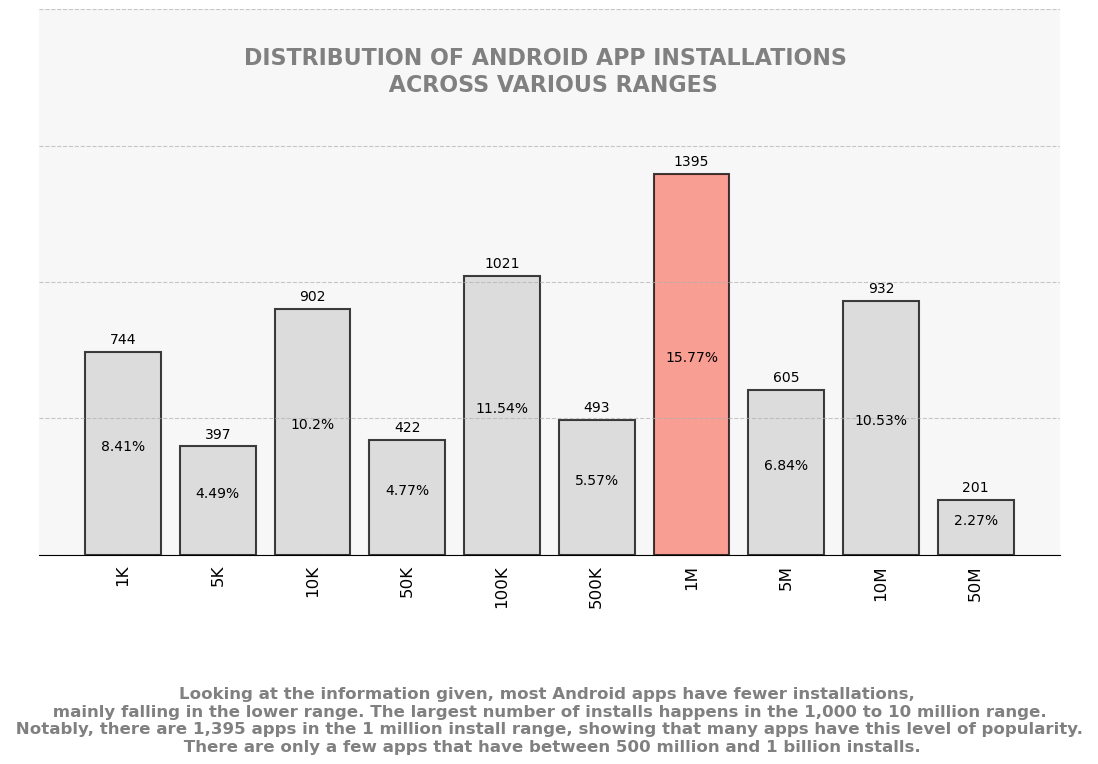

In [47]:
categories = install_freq.index[:10]
counts = install_freq.values[:10]
percentage = install_freq_perc.values[:10]

# Creating a stylish bar chart
plt.figure(figsize=(12,8))
bars = plt.bar(categories , counts , color='lightgray', alpha=0.75, edgecolor='black', linewidth=1.5)
plt.xticks(rotation=90 , fontsize=12)
plt.yticks(range(0,2500,500), [], fontsize=12)
plt.tick_params(bottom=0, left=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='')

# Find the category with highest count 
max_count_category = categories[counts.argmax()]

# Highlight the bar for the category with the highest count
max_count_index = list(categories).index(max_count_category)
bars[max_count_index].set_color('salmon')
bars[max_count_index].set_edgecolor('black')

# Adding data labels and percentages inside the bar
for bar,perc in zip(bars,percentage):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 20, '%d' % int(height), ha='center', va='bottom', fontsize=10)
    plt.text(bar.get_x() + bar.get_width()/2, height/2, f'{perc}%', ha='center', va='bottom', fontsize=10 , color='black')

# Adding a background color
ax = plt.gca()
ax.set_facecolor('#f7f7f7')

# Adding chart title
plt.text(0.5,0.85,"DISTRIBUTION OF ANDROID APP INSTALLATIONS \n ACROSS VARIOUS RANGES", ha='center',fontsize=16, transform=plt.gca().transAxes,
        color='gray', fontweight='bold')

# Adding conclusion inside the chart
plt.text(0.5, -0.36, 
"Looking at the information given, most Android apps have fewer installations, \n mainly falling in the lower range. The largest number of installs happens in the 1,000 to 10 million range. \n Notably, there are 1,395 apps in the 1 million install range, showing that many apps have this level of popularity. \n There are only a few apps that have between 500 million and 1 billion installs.", ha='center', fontsize=12, transform=plt.gca().transAxes, color='gray', fontweight='bold')

# Remove spines
for i in ['top','right','left']:
    plt.gca().spines[i].set_visible(False)

plt.tight_layout() # Adjust layout top prevent clipping

plt.show()

In [48]:
# Calculating average number of installations for each category
category_avg_installation = pd.pivot_table(android_clean , values = 'Installs' , index = 'Category' , aggfunc='mean')
category_avg_installation

,Installs
Category,
ART_AND_DESIGN,1.986335e+06
AUTO_AND_VEHICLES,6.473178e+05
BEAUTY,5.131519e+05
BOOKS_AND_REFERENCE,8.814200e+06
BUSINESS,1.712290e+06
COMICS,8.326139e+05
COMMUNICATION,3.859058e+07
DATING,8.540288e+05
EDUCATION,1.820673e+06


In [49]:
# Sorting the average installations by descending order, also applying convert_to_unit function to make it readable 
category_avg_installation = category_avg_installation.sort_values(by='Installs' , ascending=False)
category_avg_installation = category_avg_installation["Installs"].apply(convert_to_unit)
category_avg_installation

Category
COMMUNICATION           38.0M
VIDEO_PLAYERS           24.0M
SOCIAL                  23.0M
PHOTOGRAPHY             17.0M
PRODUCTIVITY            16.0M
GAME                    15.0M
TRAVEL_AND_LOCAL        13.0M
ENTERTAINMENT           11.0M
TOOLS                   10.0M
NEWS_AND_MAGAZINES       9.0M
BOOKS_AND_REFERENCE      8.0M
SHOPPING                 7.0M
PERSONALIZATION          5.0M
WEATHER                  5.0M
HEALTH_AND_FITNESS       4.0M
MAPS_AND_NAVIGATION      4.0M
FAMILY                   3.0M
SPORTS                   3.0M
ART_AND_DESIGN           1.0M
FOOD_AND_DRINK           1.0M
EDUCATION                1.0M
BUSINESS                 1.0M
LIFESTYLE                1.0M
FINANCE                  1.0M
HOUSE_AND_HOME           1.0M
DATING                 854.0K
COMICS                 832.0K
AUTO_AND_VEHICLES      647.0K
LIBRARIES_AND_DEMO     638.0K
PARENTING              542.0K
BEAUTY                 513.0K
EVENTS                 253.0K
MEDICAL                120.0K
N

In [39]:
category_df = android_clean.groupby("Category")

In [40]:
# Printing app,installs of communication category to see which app is leading.
COMMUNICATION = category_df.get_group("COMMUNICATION").sort_values(by="Installs" , ascending=False)
final_df = COMMUNICATION[["App" , "Installs"]]
final_df["Installs"] = final_df["Installs"].apply(convert_to_unit)
final_df.head(10)

,App,Installs
336,WhatsApp Messenger,1B
382,Messenger – Text and Video Chat for Free,1B
464,Hangouts,1B
411,Google Chrome: Fast & Secure,1B
391,Skype - free IM & video calls,1B
451,Gmail,1B
403,LINE: Free Calls & Messages,500M
4676,Viber Messenger,500M
420,UC Browser - Fast Download Private & Secure,500M
371,Google Duo - High Quality Video Calls,500M


In [41]:
# Printing app,installs of video players category to see which app is leading.

VIDEO_PLAYERS = category_df.get_group("VIDEO_PLAYERS").sort_values(by="Installs" , ascending=False)
final_df = VIDEO_PLAYERS[["App" , "Installs"]]
final_df["Installs"] = final_df["Installs"].apply(convert_to_unit)
final_df.head(10)

,App,Installs
3665,YouTube,1B
3687,Google Play Movies & TV,1B
3711,MX Player,500M
3675,VLC for Android,100M
4688,VivaVideo - Video Editor & Photo Movie,100M
4032,Dubsmash,100M
10647,Motorola FM Radio,100M
4696,"VideoShow-Video Editor, Video Maker, Beauty Ca...",100M
3672,Motorola Gallery,100M
3691,Samsung Video Library,50M


In [42]:
# Printing app,installs of social category to see which app is leading.

SOCIAL = category_df.get_group("SOCIAL").sort_values(by="Installs" , ascending=False)
final_df = SOCIAL[["App" , "Installs"]]
final_df["Installs"] = final_df["Installs"].apply(convert_to_unit)
final_df.head(10)

,App,Installs
2544,Facebook,1B
2554,Google+,1B
2604,Instagram,1B
2610,Snapchat,500M
2546,Facebook Lite,500M
3945,Tik Tok - including musical.ly,100M
2592,Tango - Live Video Broadcast,100M
6373,VK,100M
2552,Pinterest,100M
3951,BIGO LIVE - Live Stream,100M


In [43]:
# Printing app,installs of photography category to see which app is leading.

PHOTOGRAPHY = category_df.get_group("PHOTOGRAPHY").sort_values(by="Installs" , ascending=False)
final_df = PHOTOGRAPHY[["App" , "Installs"]]
final_df["Installs"] = final_df["Installs"].apply(convert_to_unit)
final_df.head(10)

,App,Installs
2884,Google Photos,1B
4574,"S Photo Editor - Collage Maker , Photo Collage",100M
2949,Camera360: Selfie Photo Editor with Funny Sticker,100M
2908,Retrica,100M
8307,LINE Camera - Photo editor,100M
2921,Photo Editor Pro,100M
2847,"Sweet Selfie - selfie camera, beauty cam, phot...",100M
2937,BeautyPlus - Easy Photo Editor & Selfie Camera,100M
2938,PicsArt Photo Studio: Collage Maker & Pic Editor,100M
5057,AR effect,100M


In [44]:
# Printing app,installs of productivity category to see which app is leading.

PRODUCTIVITY = category_df.get_group("PRODUCTIVITY").sort_values(by="Installs" , ascending=False)
final_df = PRODUCTIVITY[["App" , "Installs"]]
final_df["Installs"] = final_df["Installs"].apply(convert_to_unit)
final_df.head(10)

,App,Installs
3523,Google Drive,1B
3450,Microsoft Word,500M
3562,Google Calendar,500M
3574,Cloud Print,500M
3473,Dropbox,500M
3524,Adobe Acrobat Reader,100M
3489,Samsung Notes,100M
3477,Google Docs,100M
3493,SwiftKey Keyboard,100M
7808,CamScanner - Phone PDF Creator,100M


# SUMMARY

In analyzing Google Play Store data, we noticed that categories like communication, video players, and social apps are already dominated by big players like Facebook, Instagram, WhatsApp, and YouTube. It's tough for new apps to compete in these crowded spaces.

So, our recommendation is to focus on less crowded categories like productivity and photography. These areas provide a chance for developers to create a unique app and can still attract a decent number of users.

To make the app more effective, consider adding popular features like Artificial Intelligence (AI). This can personalize user experiences, predict user needs, and bring innovation, making your app stand out.

Also, with the growing interest in sustainability, think about adding eco-friendly features or promoting a green initiative in your app. This could resonate well with users who care about the environment.

In summary, targeting less crowded categories like productivity and photography, along with incorporating modern features like AI and considering eco-friendly aspects, can give your app a strategic advantage. Staying updated on market trends and user preferences is key for success in the ever-changing Google Play Store landscape.